In [1]:
!git clone https://github.com/sheelfshah/banditpylib.git

Cloning into 'banditpylib'...
remote: Enumerating objects: 7178, done.
remote: Counting objects: 100% (574/574), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 7178 (delta 419), reused 399 (delta 300), pack-reused 6604
Receiving objects: 100% (7178/7178), 10.49 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (5339/5339), done.


In [2]:
%cd banditpylib

/content/banditpylib


In [3]:
!make install

pip install --upgrade pip
     |████████████████████████████████| 1.6MB 7.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip install -r requirements.txt
     |████████████████████████████████| 227 kB 6.9 MB/s 
     |████████████████████████████████| 105 kB 12.2 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 10.3 MB 10.5 MB/s 
     |████████████████████████████████| 21.5 MB 5.0 MB/s 
     |████████████████████████████████| 15.7 MB 113 kB/s 
     |████████████████████████████████| 9.9 MB 40.3 MB/s 
     |████████████████████████████████| 3.0 MB 39.8 MB/s 
     |████████████████████████████████| 1.0 MB 36.0 MB/s 
     |████████████████████████████████| 371 kB 61.0 MB/s 
     |████████████████████████████████| 280 kB 50.3 MB/s 
     |████████████████████████████████| 510 kB 36.7 MB/s 
     |████████████████████████████████| 28.5 MB 34 kB/s 
     |█████████████████

In [4]:
!pip3 uninstall matplotlib
!pip3 install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 13.1 MB 92 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 

In [7]:
# run only if updating
%cd banditpylib
!git pull
!pip install -e .

/content/banditpylib
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 8 (delta 7), reused 8 (delta 7), pack-reused 0
Unpacking objects: 100% (8/8), done.
From https://github.com/sheelfshah/banditpylib
   fa69874..e9f9273  master     -> origin/master
Updating fa69874..e9f9273
Fast-forward
 .../learners/collaborative_learner/colaborative_learning.py      | 9 +++++----
 banditpylib/protocols/collaborative_learning_player.py           | 2 +-
 2 files changed, 6 insertions(+), 5 deletions(-)
Obtaining file:///content/banditpylib
  Attempting uninstall: banditpylib
    Found existing installation: banditpylib 1.0.0
    Can't uninstall 'banditpylib'. No files were found to uninstall.
  Running setup.py develop for banditpylib


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tempfile
import seaborn as sns
import random
sns.set(style="darkgrid")

from banditpylib import trials_to_dataframe
from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import CollaborativeLearningProtocol, SinglePlayerProtocol
from banditpylib.learners.collaborative_learner import (
    LilUCBHeuristicCollaborativeBAIAgent as Agent,
    LilUCBHeuristicCollaborativeBAIMaster as Master,
    CollaborativeBAILearner as Learner
)
from banditpylib.learners.mab_fcbai_learner import LilUCBHeuristic

In [9]:
means = [(i/10)**0.5 for i in range(1,10)]
random.shuffle(means)
print(means)

[0.5477225575051661, 0.8366600265340756, 0.7745966692414834, 0.31622776601683794, 0.7071067811865476, 0.8944271909999159, 0.6324555320336759, 0.9486832980505138, 0.4472135954999579]


In [10]:
confidence = 0.99
rounds1, horizon1, num_agents1 = 10, 30000, 20
rounds2, horizon2, num_agents2 = 10, 30000, 3

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)

master1 = Master(arm_num=len(arms), rounds=rounds1,
                horizon=horizon1, num_agents=num_agents1, name="master 1")
master2 = Master(arm_num=len(arms), rounds=rounds2,
                horizon=horizon2, num_agents=num_agents2, name="master 2")

agent1 = Agent(arm_num=len(arms), rounds=rounds1,
              horizon=horizon1, name="agent 1")
agent2 = Agent(arm_num=len(arms), rounds=rounds2,
              horizon=horizon2, name="agent 2")

learners = [
            Learner(agent=agent1, master=master1,
                   num_agents=num_agents1, name="learner 1"),
            Learner(agent=agent2, master=master2,
                   num_agents=num_agents2, name="learner 2")
]
trials = 20

In [11]:
game1 = CollaborativeLearningProtocol(bandit=bandit, learners=learners)
game1.play(trials=trials, output_filename="trial_outputs1.txt")
data_df1 = trials_to_dataframe("trial_outputs1.txt")
!rm trial_outputs1.txt

In [15]:
learners = [LilUCBHeuristic(len(arms), confidence)]
game2 = SinglePlayerProtocol(bandit=bandit, learners=learners, horizon=horizon1)
game2.play(trials=trials, output_filename="trial_outputs2.txt")
data_df2 = trials_to_dataframe("trial_outputs2.txt")
!rm trial_outputs2.txt

In [16]:
data_df = pd.concat([data_df1, data_df2])
data_df["confidence"] = confidence

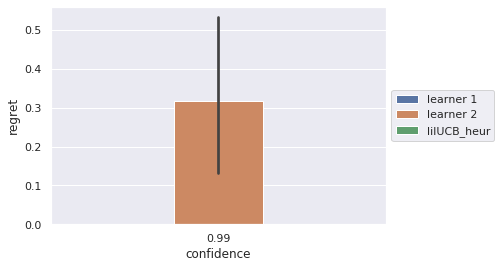

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='regret', hue='learner', data=data_df)
plt.ylabel('regret')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# non zero regret due to bug?

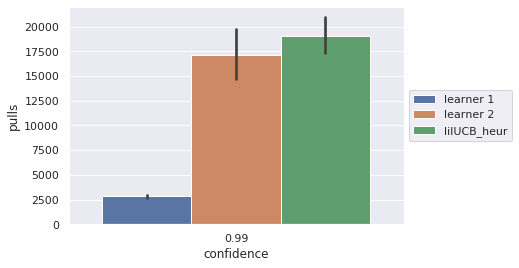

In [18]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 3 agents not fast enough ?